# Classifying Fashion-MNIST

You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. 

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets , transforms
import helper
from torch import nn
from torch import optim
import torch.nn.functional as F

In [2]:
#Defining a transform to normalise the data
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.5,),(0.5,))])

In [3]:
#Downlaod and load Train Data
trainset = datasets.FashionMNIST('./FashionMNIST',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset , batch_size=64 , shuffle=True)

In [4]:
#Downlaod and load Test Data
testset = datasets.FashionMNIST('./FashionMNIST',download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset , batch_size=64 , shuffle=True)

Here we can see one of the images.

torch.Size([64, 1, 28, 28])


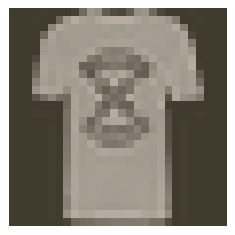

In [5]:
image , label = next(iter(trainloader))
print(image.shape)
helper.imshow(image[0,:])

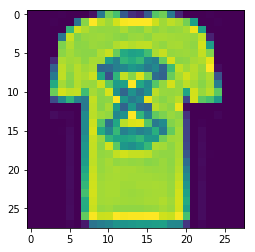

In [6]:
#Matplot implementation
import matplotlib.pyplot as plt
plt.imshow(image[0].numpy().reshape(28,28))

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [7]:
class classifier(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,32)
        self.fc4 = nn.Linear(32,10)
        
    def forward(self , x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x) , dim=1)
        
        return x
    
#You can also make the architecture using nn.Sequential like below
'''
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,32),
                     nn.ReLU(),
                     nn.Linear(32,10),
                     nn.LogSoftmax(dim=1))
'''
print('Model Architecture Ready')

Model Architecture Ready


In [8]:
model = classifier()

In [9]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters() , lr=0.003)

In [10]:
epochs = 5

for e in range(epochs):
    
    for image , label in trainloader:
        runningLoss = 0
        #Flatten
        image = image.view(image.shape[0],-1)

        #Zero the gradients
        optimizer.zero_grad()

        #Forward Pass
        output = model.forward(image)# You can also call model(image) directly

        #Calculate Loss
        loss = criterion(output , label)

        #Backward pass
        loss.backward()

        #Update Weights
        optimizer.step()

        runningLoss += loss.item()
    
    else:
        print(f"Training Loss:{runningLoss/len(trainloader) }")

Training Loss:0.0006830405706027423
Training Loss:0.0003481190214787465
Training Loss:0.00024822416272498904
Training Loss:6.80576064693394e-05
Training Loss:0.00020510285520858603


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/tensor.py:287: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


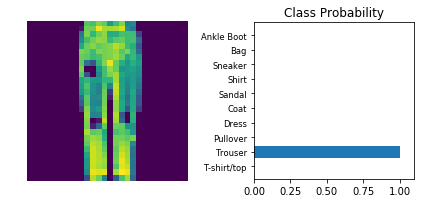

In [11]:
images , labels = next(iter(testloader))
img = images[0]
img.resize_(1,784)

with torch.no_grad():
    logps = model.forward(img)

ps = torch.exp(logps)

helper.view_classify(img.resize(1,28,28) , ps , version='Fashion')

# Cheers!